### Step 1.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [58]:
data = pd.read_csv('csv/fifa_eda_stats.csv')
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


### Step 2.

In [ ]:
hypo_age = data[[
    'Age',
    'Value'
]].copy()

hypo_age['Age'] = hypo_age['Age'].astype(int)
hypo_age['Value'] = hypo_age['Value'].str.replace('€', '', regex=False)
hypo_age['Value'] = hypo_age['Value'].apply(
    lambda value: float(value[:-1]) * 1000000 if value[-1] == 'M' else float(value[:-1]) * 1000 if value[-1] == 'K' else 0
)
hypo_age = hypo_age[ hypo_age['Value'] != 0 ]

hypo_age

,Age,Value
0,31,110500000.0
1,33,77000000.0
2,26,118500000.0
3,27,72000000.0
4,27,102000000.0
...,...,...
18202,19,60000.0
18203,19,60000.0
18204,16,60000.0
18205,17,60000.0


In [60]:
hypo_age_under_25 = hypo_age[hypo_age['Age'] < 25]
hypo_age_under_25 = hypo_age_under_25[['Value']].copy()
hypo_age_under_25 = hypo_age_under_25.reset_index(drop=True)

hypo_age_under_25 = [ float(value) for value in hypo_age_under_25.values ]

/var/folders/5r/_c42s4_d6h5g65rnc5b8q6240000gn/T/ipykernel_96990/754523524.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hypo_age_under_25 = [ float(value) for value in hypo_age_under_25.values ]


In [61]:
hypo_age_above_25 = hypo_age[hypo_age['Age'] >= 25]
hypo_age_above_25 = hypo_age_above_25[['Value']].copy()
hypo_age_above_25 = hypo_age_above_25.reset_index(drop=True)

hypo_age_above_25 = [ float(value) for value in hypo_age_above_25.values ]

/var/folders/5r/_c42s4_d6h5g65rnc5b8q6240000gn/T/ipykernel_96990/914271665.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hypo_age_above_25 = [ float(value) for value in hypo_age_above_25.values ]


In [62]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

import src.descriptive_statistics as ds
import src.hypothesis_testing as ht
import src.distributions as dist
import src.generator as gen

In [63]:
print(ht.independent_samples_z_test(
    sample_one = hypo_age_under_25,
    sample_two = hypo_age_above_25
))

{'z-statictics': -13.962410240789595, 'p-value': -8.881784197001252e-16, 'degrees_of_freedom': 17953}


In [64]:
under_25_mean = ds.mean(hypo_age_under_25)
under_25_median = ds.median(hypo_age_under_25)
under_25_std = ds.standard_deviation(hypo_age_under_25)

above_25_mean = ds.mean(hypo_age_above_25)
above_25_median = ds.median(hypo_age_above_25)
above_25_std = ds.standard_deviation(hypo_age_above_25)

Value mean < 25: 1849272.6540938362 versus >= 25: 3003592.7205961766
Value median < 25: 550000.0 versus >= 25: 850000.0
Value std < 25: 4490463.571286637 versus >= 25: 6466415.207308098


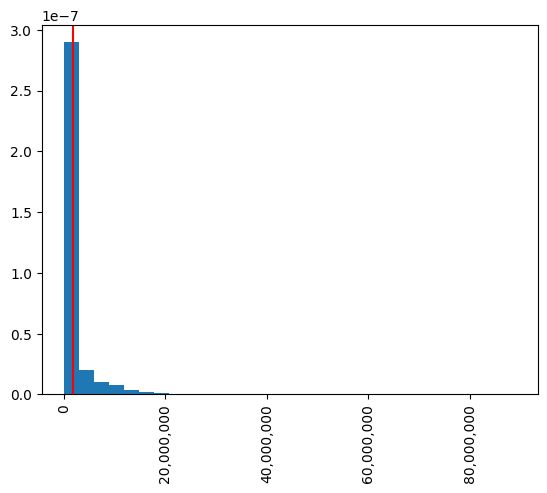

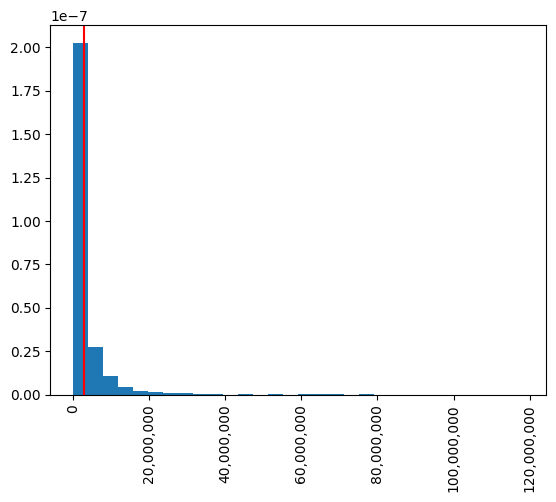

In [65]:
print('Value mean < 25:', under_25_mean, 'versus >= 25:', above_25_mean)
print('Value median < 25:', under_25_median, 'versus >= 25:', above_25_median)
print('Value std < 25:', under_25_std, 'versus >= 25:', above_25_std)

plt.hist(hypo_age_under_25, density=True, bins=30)
plt.axvline(under_25_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

plt.hist(hypo_age_above_25, density=True, bins=30)
plt.axvline(above_25_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


### Step 3:

In [66]:
hypo_nationality = data[[
    'Nationality',
    'Dribbling',
    'BallControl'
]].copy()

hypo_nationality['Dribbling'] = hypo_nationality['Dribbling'].astype(float)
hypo_nationality['BallControl'] = hypo_nationality['BallControl'].astype(float)
hypo_nationality['AverageSkills'] = ( hypo_nationality['Dribbling'] + hypo_nationality['BallControl'] ) / 2

hypo_nationality

,Nationality,Dribbling,BallControl,AverageSkills
0,Argentina,97.0,96.0,96.5
1,Portugal,88.0,94.0,91.0
2,Brazil,96.0,95.0,95.5
3,Spain,18.0,42.0,30.0
4,Belgium,86.0,91.0,88.5
...,...,...,...,...
18202,England,42.0,43.0,42.5
18203,Sweden,39.0,40.0,39.5
18204,England,45.0,44.0,44.5
18205,England,51.0,52.0,51.5


In [67]:
hypo_nationality_brazil = hypo_nationality[ hypo_nationality['Nationality'] == 'Brazil' ]
hypo_nationality_brazil = hypo_nationality_brazil.dropna()
hypo_nationality_brazil = hypo_nationality_brazil['AverageSkills'].tolist()
hypo_nationality_brazil = [ float(value) for value in list(hypo_nationality_brazil) ]

hypo_nationality_brazil

[95.5,
 73.5,
 91.5,
 91.0,
 71.0,
 30.0,
 87.5,
 80.5,
 91.5,
 79.5,
 28.5,
 83.0,
 64.0,
 70.0,
 80.0,
 82.0,
 79.0,
 67.5,
 86.0,
 86.0,
 85.5,
 84.0,
 63.0,
 74.5,
 83.0,
 59.5,
 89.0,
 84.5,
 81.0,
 21.5,
 81.0,
 70.5,
 84.0,
 72.5,
 77.5,
 82.5,
 76.5,
 62.0,
 15.0,
 85.0,
 82.5,
 85.5,
 64.5,
 79.5,
 86.0,
 56.0,
 85.0,
 82.0,
 80.5,
 81.5,
 86.0,
 77.5,
 76.0,
 58.0,
 83.0,
 82.0,
 57.5,
 58.0,
 80.5,
 65.5,
 85.5,
 80.5,
 81.5,
 80.0,
 19.0,
 73.0,
 53.0,
 77.5,
 83.5,
 76.0,
 76.5,
 79.5,
 79.0,
 74.5,
 80.5,
 78.5,
 70.0,
 67.5,
 80.5,
 69.0,
 71.5,
 75.5,
 75.5,
 75.0,
 76.0,
 75.0,
 77.5,
 66.5,
 76.5,
 58.5,
 20.0,
 81.0,
 17.0,
 80.0,
 73.0,
 68.0,
 62.0,
 76.5,
 81.5,
 74.0,
 81.5,
 20.0,
 71.5,
 57.5,
 77.0,
 75.5,
 75.0,
 74.0,
 48.5,
 72.5,
 75.0,
 78.5,
 17.0,
 74.5,
 53.0,
 77.0,
 77.5,
 76.0,
 80.5,
 16.5,
 56.0,
 57.5,
 70.5,
 79.5,
 78.5,
 71.5,
 49.5,
 76.5,
 73.5,
 82.5,
 44.0,
 74.0,
 60.0,
 80.5,
 55.5,
 57.0,
 75.0,
 50.0,
 80.5,
 57.5,
 75.5,
 70.0,
 55.5,

In [68]:
hypo_nationality_germany = hypo_nationality[ hypo_nationality['Nationality'] == 'Germany' ]
hypo_nationality_germany = hypo_nationality_germany.dropna()
hypo_nationality_germany = hypo_nationality_germany['AverageSkills'].tolist()
hypo_nationality_germany = [ float(value) for value in list(hypo_nationality_germany) ]

hypo_nationality_germany

[85.5,
 17.5,
 39.0,
 74.5,
 86.5,
 78.5,
 86.5,
 87.0,
 82.5,
 67.0,
 82.5,
 52.5,
 19.0,
 85.5,
 59.5,
 83.5,
 82.0,
 85.0,
 88.5,
 21.0,
 18.0,
 19.5,
 73.5,
 86.0,
 64.0,
 87.0,
 61.5,
 83.5,
 76.0,
 85.0,
 80.0,
 69.0,
 80.5,
 62.0,
 59.0,
 82.0,
 84.0,
 83.0,
 78.5,
 67.0,
 78.5,
 78.0,
 82.0,
 80.0,
 17.0,
 17.5,
 71.5,
 74.5,
 76.5,
 83.5,
 83.0,
 79.5,
 75.5,
 19.5,
 82.0,
 75.0,
 60.5,
 17.0,
 67.0,
 77.0,
 16.5,
 78.0,
 83.0,
 67.5,
 75.5,
 71.5,
 78.5,
 72.0,
 55.0,
 78.0,
 77.5,
 58.5,
 18.5,
 76.0,
 79.0,
 68.0,
 78.0,
 60.5,
 66.0,
 66.0,
 72.0,
 71.0,
 78.0,
 63.5,
 78.0,
 73.5,
 71.0,
 73.5,
 75.5,
 73.5,
 84.0,
 41.0,
 16.0,
 49.5,
 71.5,
 69.0,
 80.0,
 78.5,
 77.0,
 72.5,
 17.5,
 53.5,
 67.5,
 77.0,
 51.5,
 59.5,
 77.5,
 17.0,
 78.0,
 76.0,
 79.0,
 68.0,
 74.0,
 65.0,
 14.5,
 77.5,
 67.5,
 74.5,
 74.0,
 86.0,
 61.0,
 71.0,
 70.0,
 69.5,
 77.5,
 73.5,
 73.0,
 72.0,
 43.5,
 75.5,
 75.5,
 58.5,
 62.5,
 68.5,
 71.5,
 16.0,
 71.5,
 79.0,
 64.0,
 77.5,
 75.5,
 77.5,
 55.0,

In [69]:
print(ht.independent_samples_z_test(
    sample_one = hypo_nationality_brazil,
    sample_two = hypo_nationality_germany
))

{'z-statictics': 9.269172682043527, 'p-value': -8.881784197001252e-16, 'degrees_of_freedom': 2018}


In [70]:
brazil_mean = ds.mean(hypo_nationality_brazil)
brazil_median = ds.median(hypo_nationality_brazil)
brazil_std = ds.standard_deviation(hypo_nationality_brazil)

germany_mean = ds.mean(hypo_nationality_germany)
germany_median = ds.median(hypo_nationality_germany)
germany_std = ds.standard_deviation(hypo_nationality_germany)

AverageSkills mean Brazil: 62.346060606060604 versus Germany: 54.92133891213389
AverageSkills median Brazil: 68.0 versus Germany: 60.5
AverageSkills standard deviation Brazil: 17.203026295100376 versus Germany: 18.386578061514815


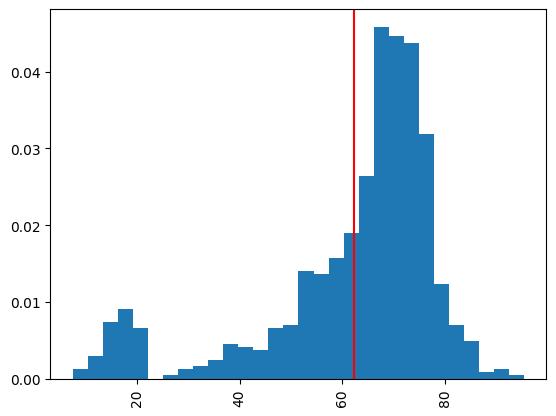

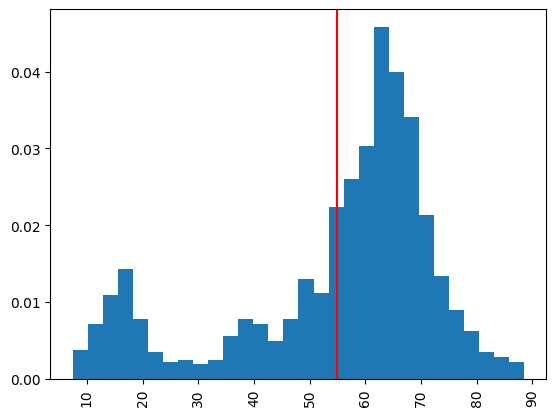

In [71]:
print('AverageSkills mean Brazil:', brazil_mean, 'versus Germany:', germany_mean)
print('AverageSkills median Brazil:', brazil_median, 'versus Germany:', germany_median)
print('AverageSkills standard deviation Brazil:', brazil_std, 'versus Germany:', germany_std)

plt.hist(hypo_nationality_brazil, density=True, bins=30)
plt.axvline(brazil_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

plt.hist(hypo_nationality_germany, density=True, bins=30)
plt.axvline(germany_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

### Step 4: